# Sharks Attack Dataset Cleaning 🦈🧹

In this notebook, we will be cleaning the `shark_attacks.csv` dataset, leaving a suitable dataset for exploratory data analysis.
However, we have been restricted for this specific task, our lead teacher has proposed the following restrictions:

- There must be the same number of columns as there are in the raw CSV, so in our final cleaned version we need to have a total of `23` columns.
- There must remain at least `2500` rows after our cleaning.
- So our `df.shape = (2500, 23)`

In [1]:
# Import the neccesary libraries for our cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

c:\Users\borja\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Step 1: Load the CSV into a Dataframe 📥

In [2]:
# Let's first address some issues, let's display ALL columns
pd.set_option('display.max_columns', 50)

In [3]:
sharks_raw = pd.read_csv('../data/shark_attacks.csv', encoding="latin-1")
pd.set_option('display.max_rows', 50)

In [4]:
# Let's save the shape of our original dataframe to make sure we comply with restrictions
original_shape = sharks_raw.shape
original_shape

(25723, 24)

In [5]:
# We now will work with our copy of the original dataframe and start cleaning
sharks = sharks_raw.copy()

## Step 2: Explore the Data


In [6]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
sharks.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [8]:
sharks.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

### Let's normalize the columns, as there is a lot of spaces, uppercases, and overall mess

In [9]:
# list of original col names
raw_cols = list(sharks.columns)
new_cols = []

for c in raw_cols:
    splitted = c.split()
    res = '_'.join(splitted).lower()
    new_cols.append(res)
    
new_cols

['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal_(y/n)',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number.1',
 'case_number.2',
 'original_order',
 'unnamed:_22',
 'unnamed:_23']

In [10]:
new_cols[-5] = new_cols[-5].replace('.', '_')
new_cols[-4] = new_cols[-4].replace('.', '_')
new_cols[12] = 'fatal'
new_cols[-2] = 'unnamed_1'
new_cols[-1] = 'unnamed_2'

new_cols

['case_number',
 'date',
 'year',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex',
 'age',
 'injury',
 'fatal',
 'time',
 'species',
 'investigator_or_source',
 'pdf',
 'href_formula',
 'href',
 'case_number_1',
 'case_number_2',
 'original_order',
 'unnamed_1',
 'unnamed_2']

In [11]:
sharks.columns = new_cols
sharks

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_1,unnamed_2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Check for duplicated rows 👥
As a first step in actually cleaning, we will check for duplicated rows, as 2x rows exactly the same won't be useful for our analysis

In [12]:
sharks.duplicated().value_counts()

True     19411
False     6312
dtype: int64

In [13]:
# We have over 19,000 duplicated rows, let's drop them
sharks.drop_duplicates(inplace=True)
sharks.duplicated().value_counts()

False    6312
dtype: int64

## Step 4: Null cleaning 
#### Now that we have no duplicated rows, we will check how many null values we have in our dataframe
#### I believe visualizing the nulls with a heatmap can be very useful to understand the big picture of nulls present in any dataframe

In [14]:
# My function to plot nulls

def plot_null_heatmap(df):
    # Create a heatmap of null values in the DataFrame
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Null Values Heatmap")
    plt.show()

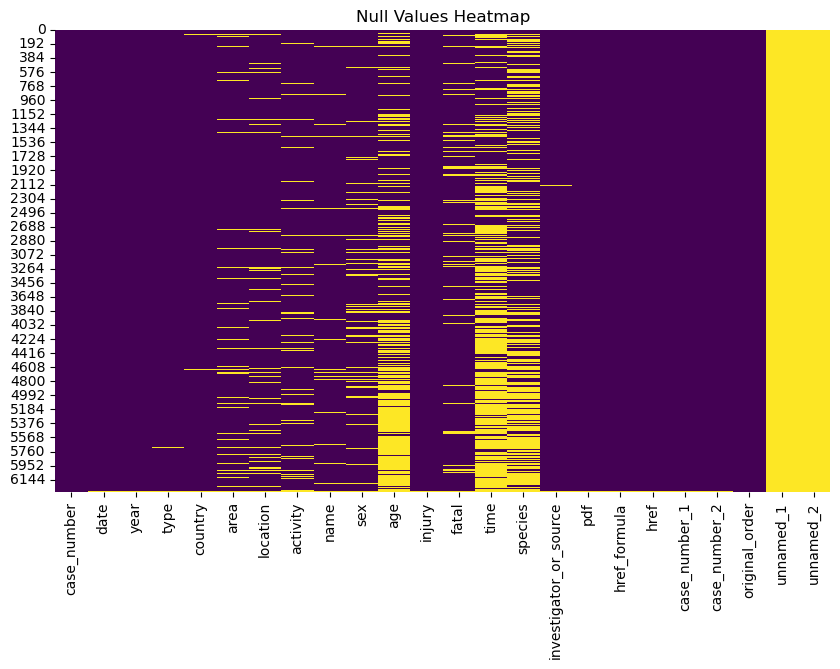

In [15]:
plot_null_heatmap(sharks)

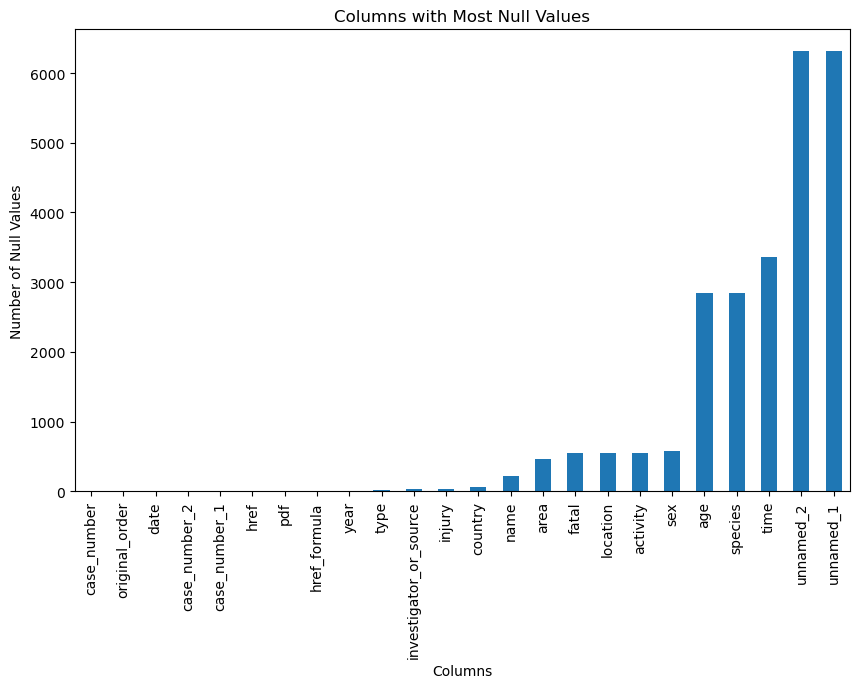

In [16]:
# Calculate the number of null values in each column
null_counts = sharks.isnull().sum()

# Sort the columns by the number of null values (ascending)
null_counts = null_counts.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Columns with Most Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()


#### 2 columns instantly stand out, let's move on!

In [17]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6310 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal                   5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null  

#### Let's find out the columns with null values!

In [18]:
# columnas con valores nulos

nan_cols = sharks.isna().sum()

nan_cols[nan_cols>0]

nan_cols.sort_values(ascending=False)

unnamed_1                 6311
unnamed_2                 6310
time                      3364
species                   2848
age                       2841
sex                        575
activity                   554
location                   550
fatal                      549
area                       465
name                       220
country                     60
injury                      38
investigator_or_source      27
type                        14
year                        12
href_formula                11
date                        10
pdf                         10
href                        10
case_number_1               10
case_number_2               10
original_order               3
case_number                  2
dtype: int64

#### There is a huge amount of nulls in the `unnamed_22` and `unname_23`
- Let's first address these 2 columns, we know we have `6312` rows after removing duplicated rows, so they are practically empty.
- According to the restrictions, we need to have 23 cols at the end of our analysis, so lets drop both and later fix it!

In [19]:
sharks.drop(columns=['unnamed_1', 'unnamed_2'], axis=1, inplace=True)

In [20]:
sharks.isna().sum().sort_values(ascending=False).head(10)

time        3364
species     2848
age         2841
sex          575
activity     554
location     550
fatal        549
area         465
name         220
country       60
dtype: int64

The next column with a significant amount of `null` values is Time with `3364`

In [21]:
sharks[sharks["time"].notnull()].time.value_counts()

Afternoon      187
11h00          128
Morning        121
12h00          109
15h00          108
              ... 
14h37            1
10h07            1
13h53            1
13h23            1
19h00-20h00      1
Name: time, Length: 366, dtype: int64

As it name implies, simply the time at which the attack took place, let`s find the proportion of nulls of the column

In [22]:
sharks.shape

(6312, 22)

In [23]:
sharks.time.isna().value_counts(normalize=True)

True     0.532953
False    0.467047
Name: time, dtype: float64

#### `46.7%` of the `Time` column are null values, and we can no longer remove columns, so let's address it this way:
- We can remove rows. We have a total of `6312` rows, and we are limited to a minimum of  `2,500`
- Let's remove the NaN first, and then try to standarize the `Time` column with more uniform values

In [24]:
sharks['time'].fillna('unknown', inplace=True)
shape = sharks.shape

#### As for the rest of the values in this columns, let's try to standarize it into three categories: `morning`, `afternoon`, `evening` and `night`

In [25]:
def standardize_time(df):
    # Define a regular expression pattern to match time values like "10h30"
    time_pattern = r'(\d{1,2})[h:](\d{2})'

    def categorize_time(time_str):

        if "noon" in time_str.lower() or "lunch" in time_str.lower() or "afternon" in time_str.lower() or "1500" in time_str.lower():
            return "afternoon"       
        if "morning" in time_str.lower() or "midday" in time_str.lower() or "dawn" in time_str.lower() or "daybreak" in time_str.lower() or "1300" in time_str.lower() or "0830" in time_str.lower():
            return "morning"
        if "night" in time_str.lower() or "dark" in time_str.lower() or "0500" in time_str.lower():
            return "night"
        if "dusk" in time_str.lower() or "sunset" in time_str.lower() or "evening" in time_str.lower() or "sundown" in time_str.lower():
            return "evening"
        
        else:
            pass


        # Extract hour and minute using the regular expression pattern
        match = re.search(time_pattern, time_str)
        if match:
            hour = int(match.group(1))
            minute = int(match.group(2))

            if 0 <= hour < 6:
                return 'night'
            elif 6 <= hour < 12:
                return 'morning'
            elif 12 <= hour < 18:
                return 'afternoon'
            else:
                return 'evening'
        else:
            # If the string does not match the pattern, return it as is
            return "unknown"

    # Apply the categorize_time function to the "Time" column
    df['time'] = df['time'].apply(categorize_time)

    return df



In [26]:
standardize_time(sharks)
sharks.time.value_counts()

unknown      3410
afternoon    1558
morning       933
evening       294
night         117
Name: time, dtype: int64

#### Let's check out the next null column we can fix.

Text(0, 0.5, 'Number of Null Values')

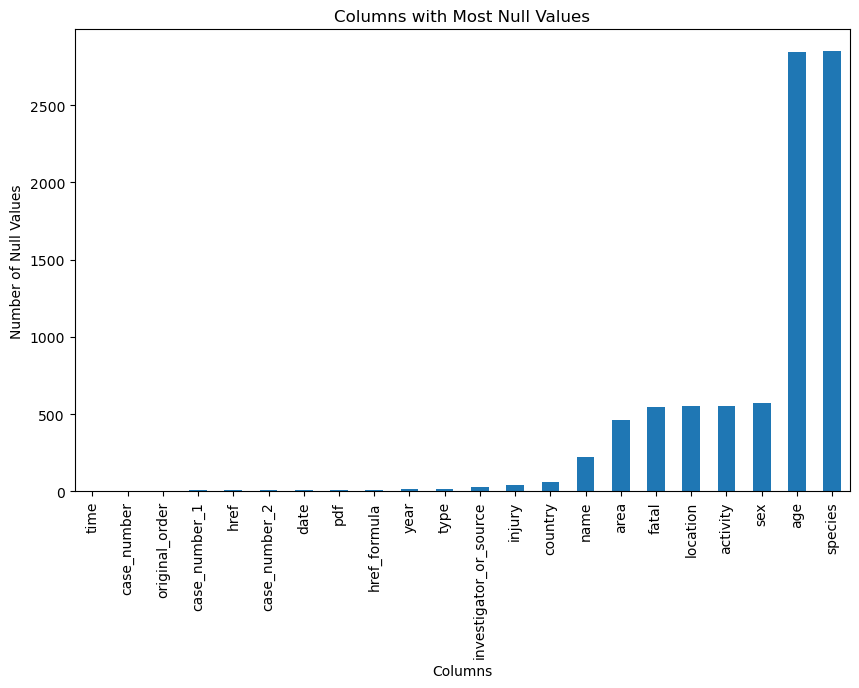

In [27]:
# Calculate the number of null values in each column
null_counts = sharks.isnull().sum()

# Sort the columns by the number of null values (ascending)
null_counts = null_counts.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar')
plt.title('Columns with Most Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')


In [28]:
sharks.species.head(15)

0               White shark
1                       NaN
2                       NaN
3                 2 m shark
4           Tiger shark, 3m
5                       NaN
6               Tiger shark
7           Lemon shark, 3'
8            Bull shark, 6'
9                       NaN
10          Grey reef shark
11                      NaN
12                      NaN
13         Invalid incident
14    Tawny nurse shark, 2m
Name: species, dtype: object

#### Truly bad column without any sort of norm, we will fill nulls with unknown for now and send an email to the Data Engineer

In [29]:
sharks.species.fillna('unknown', inplace=True)
sharks["species"].isnull().value_counts()

False    6312
Name: species, dtype: int64

In [30]:
sharks.isnull().sum().sort_values(ascending=False)

age                       2841
sex                        575
activity                   554
location                   550
fatal                      549
area                       465
name                       220
country                     60
injury                      38
investigator_or_source      27
type                        14
year                        12
href_formula                11
href                        10
date                        10
case_number_2               10
case_number_1               10
pdf                         10
original_order               3
case_number                  2
species                      0
time                         0
dtype: int64

### We have several null columns left, where we are left without much clue on how to fill the missing values, so let's fill them with unknowns

In [31]:
sharks.fillna('unknown', inplace=True)

In [32]:
sharks.isnull().sum().any()

False

In [33]:
sharks.shape

(6312, 22)

#### No more null values in our Dataframe. We had to fill several `NaN` values with `unknown` but we are on our way to cleaning all the dataset. Now we can start with Incorrect values.

## Step 5: Normalizing and Standardizing Values ✅

#### Let's take a look into the columns from left to right, keeping in mind we still can remove `3812` rows

In [34]:
sharks.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,evening,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,afternoon,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,morning,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


### Normalizing `year` column

In [35]:
sharks.year

0         2018.0
1         2018.0
2         2018.0
3         2018.0
4         2018.0
          ...   
6307     unknown
6308     unknown
6309     unknown
8702     unknown
25722    unknown
Name: year, Length: 6312, dtype: object

#### Let's remove rows that have more than 5 `unknown` values

In [36]:
count_unknown = (sharks == 'unknown').sum(axis=1)

# Filter rows with no more than 5 'unknown' values
sharks = sharks[count_unknown <= 5]

sharks.shape

(6167, 22)

`145` rows dropped, rows with 5 or more unkowns are not worth and not that many to affect our analysis

In [37]:
sharks.year.unique()

array([2018.0, 2017.0, 'unknown', 2016.0, 2015.0, 2014.0, 2013.0, 2012.0,
       2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0,
       2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0,
       1995.0, 1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0,
       1969.0, 1988.0, 1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0,
       1980.0, 1979.0, 1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0,
       1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0,
       1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0,
       1955.0, 1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0,
       1848.0, 1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0,
       1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0,
       1932.0, 1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0,
       1924.0, 1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0,
       1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0,
   

In [38]:
for value in sharks['year']:
    if isinstance(value, str):
        print(value)

unknown
unknown


In [39]:
# Use boolean indexing to select rows that don't have 'unknown' in the 'Year' column
sharks = sharks[sharks['year'] != 'unknown']

In [40]:
sharks.year.astype(int)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297       0
6298       0
6299       0
6300       0
6301       0
Name: year, Length: 6165, dtype: int32

In [41]:
len(sharks[sharks['year'] < 1700])

128

#### We will remove the `128` rows with attacks in years earlier than `1700`

In [42]:
sharks = sharks[sharks['year'] > 1700]
sharks.shape

(6034, 22)

In [43]:
sharks['year'] = sharks['year'].astype(int)


In [44]:
sharks.year.info()

<class 'pandas.core.series.Series'>
Int64Index: 6034 entries, 0 to 6160
Series name: year
Non-Null Count  Dtype
--------------  -----
6034 non-null   int32
dtypes: int32(1)
memory usage: 70.7 KB


### Normalizing `type` column

In [45]:
sharks.type.head()

0       Boating
1    Unprovoked
2       Invalid
3    Unprovoked
4      Provoked
Name: type, dtype: object

#### Let's check the number of `unknown` values in `Type column`

In [46]:
len(sharks[sharks['type']=='unknown'])

3

In [47]:
sharks = sharks[sharks['type'] != 'unknown']

In [48]:
sharks.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Boat', 'Boatomg'], dtype=object)

In [49]:
sharks['type'] = sharks['type'].str.replace('.*Boat.*', 'Boat', regex=True)
sharks.type.value_counts()

Unprovoked      4419
Provoked         564
Invalid          504
Boat             330
Sea Disaster     212
Questionable       2
Name: type, dtype: int64

Seeing there is only 2 `Questionable` let's just drop them

In [50]:
sharks = sharks[sharks.type != 'Questionable']
sharks.type.value_counts()

Unprovoked      4419
Provoked         564
Invalid          504
Boat             330
Sea Disaster     212
Name: type, dtype: int64

### Normalizing `country` column

In [51]:
sharks[sharks['country']=="unknown"].shape

(23, 22)

#### Let's proceed and remove the 23 rows with `unknown` countries

In [52]:
sharks = sharks[sharks['country']!="unknown"]

In [53]:
sharks.country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'Fiji', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'FIJI', 'PUERTO RICO', 'ITALY', 'ATLANTIC OCEAN',
       'GREECE', 'ST. MARTIN', 'FRANCE', 'PAPUA NEW GUINEA',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA',
       'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA',
       'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'UNITED ARAB EMIRATE

In [54]:
sharks[sharks['country'].str.contains('\?')]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
4345,1954.04.00,Apr-1954,1954,Provoked,SUDAN?,Red Sea,Southern part,Spearfishing,Jean Foucher-Createau,M,unknown,"Speared small shark, shark bit his thigh and/o...",N,unknown,unknown,"V.M. Coppleson (1962), p.254; H.D. Baldridge, ...",1954.04.00-Foucher-Creteau.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1954.04.00,1954.04.00,1958.0
5894,1872.11.30.R,Reported 30-Nov-1872,1872,Unprovoked,INDIAN OCEAN?,unknown,unknown,Swimming to avoid capture,Malay pirates,M,unknown,FATAL,Y,unknown,unknown,"The Mercury, 11/230/1872",1872.11.30.R-MalayPirates.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1872.11.30.R,1872.11.30.R,409.0


Let's remove the '?' from these 2 rows

In [55]:
sharks['country'] = sharks['country'].str.replace('?', '')

C:\Users\borja\AppData\Local\Temp\ipykernel_4380\2836544271.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sharks['country'] = sharks['country'].str.replace('?', '')


### Normalizing `activity` column

We will use regex to join values that share the same keywords and reduce a little bit the amount of activities `1453`

In [56]:
sharks.activity.value_counts().shape

(1453,)

In [57]:
fishing_activities = {
    'Angling',
    'Fisherman',
    'Fishing',
    'Clamming',
    'Crabbing',
    'Lobstering',
    'Oystering',
    'Shrimping',
    'Spearfishing'
}

surfing_activities = {
    'Surfing',
    'Skimboarding',
    'Kiteboarding',
    'Kitesurfing',
    'Windsurfing',
    'Bodyboarding',
    'Surf',
    'Wakeboarding',
    'SUP'
}
bathing_activities = {
    'Bather',
    'Bathing',
    'Bath'
}

boating_activities = {
    'Boat',
    'Paddling',
    'Canoeing',
    'Rowing',
    'Sailing',
    'Kayaking',
    'Cruising',
    'Filming',
    'Hilo',
    'Sculling'
}

swimming_activities = {
    'Jumping',
    'Playing',
    'Swimming',
    'Splashing',
    'Swim'
}

diving_activities = {
    'Skindiving',
    'Snorkeling',
    'Diving'
}

other_activities = {
    'Washing',
    'Rescuing',
    'Shipwreck',
    'Sitting',
    'Standing',
    'Suicide',
    'Unknown',
    'Wading',
    'Walking',
    'Crawling'
}


In [58]:
def activity_category(c):
    
    c = c.lower() # Make the string lowercase

    for i in fishing_activities:
        if fuzz.partial_ratio(i.lower(), c) > 80:
            return 'Fishing'
    
    for i in surfing_activities:
        if fuzz.partial_ratio(i.lower(), c) > 80:
            return 'Surfing'
    
    for i in bathing_activities:
        if fuzz.partial_ratio(i.lower(), c) > 80:
            return 'Bathing'

    for i in swimming_activities:
        if fuzz.partial_ratio(i.lower(), c) > 80:
            return 'Swimming'

    for i in diving_activities:
        if fuzz.partial_ratio(i.lower(), c) > 80:
            return 'Diving'

    for i in boating_activities:
        if fuzz.partial_ratio(i.lower(), c )> 80:
            return 'Boating'

    return 'Other'

In [59]:
sharks['activity_category'] = sharks.activity.apply(activity_category)

In [60]:
sharks.activity_category.value_counts()

Surfing     1507
Other       1263
Fishing     1174
Swimming    1093
Diving       560
Bathing      214
Boating      195
Name: activity_category, dtype: int64

### Normalizing `name` column

In [61]:
sharks.name.value_counts()[sharks.name.value_counts() > 2]

male               506
unknown            134
female              94
boy                 20
2 males             14
boat                13
Anonymous           10
child               10
sailor              10
a sailor             8
Unidentified         6
girl                 6
males                6
a native             5
Unknown              4
fisherman            4
a soldier            4
black male           4
2 fishermen          4
Zulu male            3
Andre Hartman        3
Japanese diver       3
dinghy               3
John Williams        3
a pearl diver        3
 male                3
M.C.                 3
Arab boy             3
2 women              3
native boy           3
Russian male         3
aboriginal male      3
Name: name, dtype: int64

So many incorrect values, let's normalize this column and clean it!

In [62]:
name_counts = sharks.name.value_counts()

repeated_names = name_counts[name_counts > 2].index

sharks.name = sharks.name.apply(lambda x: 'unknown' if x in repeated_names else x) # Replace the value if it appears more than twice with 'unknown'

In [63]:
# Split the "name" column into "first_name" and "second_name"
sharks[['first_name', 'second_name']] = sharks['name'].str.split(' ', n=1, expand=True)

In [64]:
sharks.second_name.isna().sum()

1104

In [65]:
sharks.second_name.fillna('unknown', inplace=True)

In [66]:
sharks.shape

(6006, 25)

In [67]:
# Remove values with 1 character or more than 25 characters in "first_name" and "second_name" using regex
sharks = sharks[~sharks['first_name'].str.contains(r'^.{1}$|^.{26,}$', regex=True) &
                ~sharks['second_name'].str.contains(r'^.{1}$|^.{26,}$', regex=True)]

In [68]:
# Create a regular expression pattern to match 1 - 4 character strings with a '.'
pattern = r'\b\w{1,2,3,4}\.\w*'

# Use the str.replace method to remove the matching values
sharks['first_name'] = sharks['first_name'].str.replace(pattern, '', regex=True)


In [69]:
sharks['first_name'] = sharks['first_name'].str.replace(r'\d+', '', regex=True)


In [70]:
# Remove values with dots from the "your_column"
sharks = sharks[~(sharks['first_name'].str.contains(r'[.,:"\']', regex=True, na=False))]

# Reset the index if needed
sharks.reset_index(drop=True, inplace=True)

In [71]:
sharks = sharks[sharks['first_name'].str.len() > 2]

In [72]:
sharks.shape

(5088, 25)

Drop original `name` column as we have two better columns now

In [73]:
sharks.drop(columns='name', inplace=True)

In [74]:
# Now lets remove any rows with special chars from the second name column and move on to the next one, sex
sharks = sharks[~(sharks['second_name'].str.contains(r'[.,:"\']', regex=True, na=False))]

### Normalizing `sex` column

In [75]:
sharks.sex.value_counts()

M          4067
F           566
unknown     205
M             2
lli           1
.             1
Name: sex, dtype: int64

In [76]:
sharks.sex.str.strip()

0       F
1       F
2       M
3       M
4       M
       ..
5131    M
5132    M
5133    M
5134    M
5135    M
Name: sex, Length: 4842, dtype: object

In [77]:
sharks['sex'] = np.where((sharks['sex'] == 'M ') | (sharks['sex'] == 'N') | (sharks['sex'] == 'lli') | (sharks['sex'] == 'M'), 'M', np.where(sharks['sex'] == 'F', 'F', 'unknown'))
sharks.sex.value_counts()

M          4070
F           566
unknown     206
Name: sex, dtype: int64

### Normalizing `age` column

In [78]:
sharks.age.value_counts()

unknown    1763
17          140
18          127
19          126
15          125
           ... 
67            1
Elderly       1
mid-20s       1
74            1
1             1
Name: age, Length: 133, dtype: int64

In [79]:
sharks.age = sharks.age.str.strip()  # Remove leading/trailing spaces
sharks.age = sharks.age.str.replace(r'\s+', '', regex=True)  # Remove random spaces

sharks.age.value_counts()

unknown    1763
17          140
18          127
19          126
15          125
           ... 
67            1
Elderly       1
mid-20s       1
21or26        1
1             1
Name: age, Length: 126, dtype: int64

This code uses a regular expression `(\d+)` to find the numeric part of the age, and it checks if the extracted value is between 0 and 90. If the age contains non-numeric characters or is outside the valid range, it sets the age to `'unknown'`


In [80]:
sharks['age'] = sharks['age'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) and 0 <= int(re.search(r'\d+', x).group()) <= 90 else 'unknown')

### Normalizing the `species` column

In [81]:
sharks.species.value_counts()

unknown                                               2086
White shark                                            131
Shark involvement not confirmed                         76
Shark involvement prior to death was not confirmed      72
Invalid                                                 65
                                                      ... 
Spinner shark, 1.2 m to 1.5 m [4' to 5']                 1
Tiger shark, 8'                                          1
Bronze whaler shark, 2.5 m [8.25']  k                    1
1.8 m to 2.4 m [6' to 8'] "black finned shark"           1
White shark, 1600-lb female                              1
Name: species, Length: 1281, dtype: int64

In [82]:
# Lets make a list with the most common species
shark_species = {
    'bull',
    'tiger',
    'lemon',
    'great hammerhead',
    'nurse',
    'blacktip',
    'sandbar',
    'thresher',
    'blue',
    'mako',
    'hammerhead',
    'goblin',
    'zambesi',
    'angel',
    'leopard',
    'spinner',
    'silky',
    'white',
    'galapagos',
    'reef',
    'porbeagle',
    'whitetip',
    'tawny',
    'basking',
    'cow',
    'dusky',
    'wobbegong',
    'megamouth',
    'cookiecutter',
    'spurdog',
    'lemonsole',
    'smoothhound',
    'swellshark',
    'banded cat',
    'gulper',
    'sleeper',
    'dogfish',
    'bramble',
    'velvet belly lantern',
    'caribbean reef'
}

In [83]:
def fill_species(x):
    
    '''
    Categorize each shark.
    
    '''
    x = x.lower()
    for i in shark_species:
        i = i.lower()
        if fuzz.partial_ratio(i.lower(), x) > 80:
            return i.capitalize()
        
    return 'Other'

In [84]:
sharks.rename(columns={'species': 'shark', 'case_number_1': 'shark_species', 'case_number_2': 'shark_size'}, inplace=True)

new_col_order = ['case_number', 'date', 'year', 'time', 'country', 'area', 'location',
       'first_name', 'second_name', 'sex', 'age', 'type', 'activity_category', 'activity', 'injury', 'fatal', 'shark_species', 'shark_size',
       'original_order', 'investigator_or_source', 'pdf', 'href_formula',
       'href', 'shark']

sharks = sharks[new_col_order]

# And apply the function
sharks.shark_species = sharks.shark.apply(fill_species)

sharks.shark_species.value_counts()

Other               3388
White                509
Tiger                235
Bull                 143
Nurse                 80
Blue                  69
Reef                  57
Blacktip              51
Wobbegong             47
Spinner               43
Mako                  34
Lemon                 31
Zambesi               30
Hammerhead            29
Whitetip              26
Dusky                 12
Porbeagle              7
Sandbar                6
Banded cat             6
Angel                  6
Galapagos              5
Great hammerhead       4
Dogfish                3
Tawny                  3
Leopard                3
Silky                  2
Goblin                 2
Cookiecutter           2
Thresher               2
Basking                2
Bramble                2
Smoothhound            1
Cow                    1
Spurdog                1
Name: shark_species, dtype: int64

In [85]:
# now use regex to extract the size
pattern = r'(\d+(?:\.\d+)?)\s*m'

sharks.shark_size = sharks.shark.str.extract(pattern) + 'm'

sharks.shark_size.fillna('unknown', inplace=True)

sharks.head()

,case_number,date,year,time,country,area,location,first_name,second_name,sex,age,type,activity_category,activity,injury,fatal,shark_species,shark_size,original_order,investigator_or_source,pdf,href_formula,href,shark
0,2018.06.25,25-Jun-2018,2018,evening,USA,California,"Oceanside, San Diego County",Julie,Wolfe,F,57,Boat,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,White,unknown,6303.0,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,White shark
1,2018.06.18,18-Jun-2018,2018,afternoon,USA,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,,F,11,Unprovoked,Other,Standing,Minor injury to left thigh,N,Other,unknown,6302.0,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,unknown
2,2018.06.09,09-Jun-2018,2018,morning,USA,Hawaii,"Habush, Oahu",John,Denges,M,48,Invalid,Surfing,Surfing,Injury to left lower leg from surfboard skeg,N,Other,unknown,6301.0,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,unknown
3,2018.06.08,08-Jun-2018,2018,unknown,AUSTRALIA,New South Wales,Arrawarra Headland,unknown,unknown,M,unknown,Unprovoked,Surfing,Surfing,Minor injury to lower leg,N,Other,2m,6300.0,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2 m shark
4,2018.06.04,04-Jun-2018,2018,unknown,MEXICO,Colima,La Ticla,Gustavo,Ramos,M,unknown,Provoked,Diving,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Tiger,3m,6299.0,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"Tiger shark, 3m"


### Normalizing the `date` column

In [86]:
sharks.date.head(20)

0              25-Jun-2018
1              18-Jun-2018
2              09-Jun-2018
3              08-Jun-2018
4              04-Jun-2018
5              03-Jun-2018
6              27-May-2018
7              26-May-2018
8              26-May-2018
9              24-May-2018
10             21-May-2018
11             13-May-2018
12             13-May-2018
13                May 2018
14             12-May-2018
15    Reported 30-Apr-2018
16             28-Apr-2018
17             28-Apr-2018
18             25-Apr-2018
19             24-Apr-2018
Name: date, dtype: object

In [87]:
# Remove "Reported" using str.replace and a regular expression
sharks['date'] = sharks['date'].str.replace(r'^Reported\s', '', regex=True)

In [88]:
# Extract day, month, and year using regular expressions
sharks[['day', 'month', 'year2']] = sharks['date'].str.extract(r'(\d+)?-(\w+)?-(\d+)?')

# Fill 'unknown' for missing values
sharks['day'].fillna('unknown', inplace=True)
sharks['month'].fillna('unknown', inplace=True)
sharks['year'].fillna('unknown', inplace=True)

# Resulting DataFrame
sharks.head()


,case_number,date,year,time,country,area,location,first_name,second_name,sex,age,type,activity_category,activity,injury,fatal,shark_species,shark_size,original_order,investigator_or_source,pdf,href_formula,href,shark,day,month,year2
0,2018.06.25,25-Jun-2018,2018,evening,USA,California,"Oceanside, San Diego County",Julie,Wolfe,F,57,Boat,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,White,unknown,6303.0,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,25,Jun,2018
1,2018.06.18,18-Jun-2018,2018,afternoon,USA,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,,F,11,Unprovoked,Other,Standing,Minor injury to left thigh,N,Other,unknown,6302.0,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,unknown,18,Jun,2018
2,2018.06.09,09-Jun-2018,2018,morning,USA,Hawaii,"Habush, Oahu",John,Denges,M,48,Invalid,Surfing,Surfing,Injury to left lower leg from surfboard skeg,N,Other,unknown,6301.0,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,unknown,09,Jun,2018
3,2018.06.08,08-Jun-2018,2018,unknown,AUSTRALIA,New South Wales,Arrawarra Headland,unknown,unknown,M,unknown,Unprovoked,Surfing,Surfing,Minor injury to lower leg,N,Other,2m,6300.0,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2 m shark,08,Jun,2018
4,2018.06.04,04-Jun-2018,2018,unknown,MEXICO,Colima,La Ticla,Gustavo,Ramos,M,unknown,Provoked,Diving,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Tiger,3m,6299.0,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"Tiger shark, 3m",04,Jun,2018


In [89]:
filtered_df = sharks[(sharks['year'] == 'unknown') & (sharks['year2'] != 'unknown')]
filtered_df

,case_number,date,year,time,country,area,location,first_name,second_name,sex,age,type,activity_category,activity,injury,fatal,shark_species,shark_size,original_order,investigator_or_source,pdf,href_formula,href,shark,day,month,year2


Let's drop the year2 & date column and rearrange order of columns

In [90]:
sharks.drop(columns=['year2', 'date'], inplace=True)

In [91]:
sharks.columns

Index(['case_number', 'year', 'time', 'country', 'area', 'location',
       'first_name', 'second_name', 'sex', 'age', 'type', 'activity_category',
       'activity', 'injury', 'fatal', 'shark_species', 'shark_size',
       'original_order', 'investigator_or_source', 'pdf', 'href_formula',
       'href', 'shark', 'day', 'month'],
      dtype='object')

In [92]:
new_order = ['day', 'month', 'year', 'time', 'country', 'area', 'location',
       'first_name', 'second_name', 'sex', 'age', 'type', 'activity_category',
       'activity', 'injury', 'fatal', 'shark_species', 'shark_size',
       'original_order', 'investigator_or_source', 'pdf', 'href_formula',
       'href', 'shark', 'case_number']

In [93]:
sharks = sharks[new_order]

### Normalizing the `fatal` column

In [94]:
sharks.fatal.value_counts()

N          3408
Y           991
unknown     390
UNKNOWN      43
 N            6
M             1
2017          1
N             1
y             1
Name: fatal, dtype: int64

In [95]:
sharks[sharks['fatal'] == 'M']

,day,month,year,time,country,area,location,first_name,second_name,sex,age,type,activity_category,activity,injury,fatal,shark_species,shark_size,original_order,investigator_or_source,pdf,href_formula,href,shark,case_number
272,18,Apr,2016,morning,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Hoata,Iotua,M,22,Provoked,Fishing,Spearfishing,Laceration to knee by speared shark PROVOKED I...,M,Reef,2m,6018.0,"TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"Grey reef shark, 2 m",2016.04.18.b


In [96]:
# Step 1: Remove all spaces and convert all values to uppercase
sharks['fatal'] = sharks['fatal'].str.replace(" ", "").str.upper()
# Step 2: Replace 'M' with 'N'
sharks['fatal'].replace({'M': 'N'}, inplace=True)
# Step 3: Remove the row with '2017'
sharks = sharks[sharks['fatal'] != '2017']


sharks.fatal.value_counts()

N          3416
Y           992
UNKNOWN     433
Name: fatal, dtype: int64

## Step 6: Export clean dataset 💾

In [98]:
original_shape

(25723, 24)

In [99]:
sharks.shape

(4841, 25)

In [100]:
sharks.duplicated().any()

False

In [101]:
sharks.head()

,day,month,year,time,country,area,location,first_name,second_name,sex,age,type,activity_category,activity,injury,fatal,shark_species,shark_size,original_order,investigator_or_source,pdf,href_formula,href,shark,case_number
0,25,Jun,2018,evening,USA,California,"Oceanside, San Diego County",Julie,Wolfe,F,57,Boat,Boating,Paddling,"No injury to occupant, outrigger canoe and pad...",N,White,unknown,6303.0,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,White shark,2018.06.25
1,18,Jun,2018,afternoon,USA,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,,F,11,Unprovoked,Other,Standing,Minor injury to left thigh,N,Other,unknown,6302.0,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,unknown,2018.06.18
2,09,Jun,2018,morning,USA,Hawaii,"Habush, Oahu",John,Denges,M,48,Invalid,Surfing,Surfing,Injury to left lower leg from surfboard skeg,N,Other,unknown,6301.0,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,unknown,2018.06.09
3,08,Jun,2018,unknown,AUSTRALIA,New South Wales,Arrawarra Headland,unknown,unknown,M,unknown,Unprovoked,Surfing,Surfing,Minor injury to lower leg,N,Other,2m,6300.0,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2 m shark,2018.06.08
4,04,Jun,2018,unknown,MEXICO,Colima,La Ticla,Gustavo,Ramos,M,unknown,Provoked,Diving,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Tiger,3m,6299.0,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,"Tiger shark, 3m",2018.06.04


In [102]:
sharks.reset_index(inplace=True)
sharks.to_csv('../data/shark_attacks_clean.csv')